In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [44]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [54]:
# List column name and their types
measure_col = inspector.get_columns('measurement')
for column in measure_col:
    print (column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

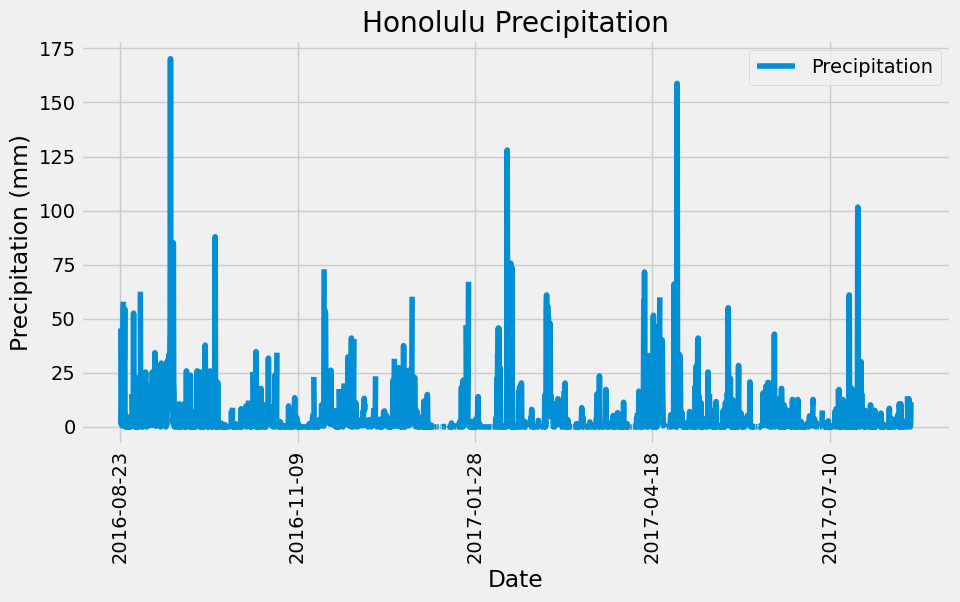

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
data = [Measurement.date,Measurement.prcp]
query_tab = session.query(*data).filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(query_tab, columns = ['Date','Precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(['Date'], ascending=True)
precip_df = precip_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90, figsize=(10, 5))
plt.title("Honolulu Precipitation")
plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.savefig("Honolulu_Precipitation")

In [85]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [93]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count

In [106]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_act = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(12.2, 29.4, 22.03582251082252)]

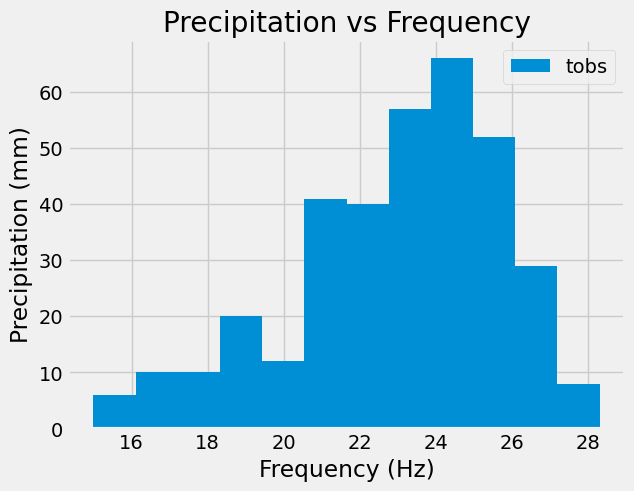

In [102]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station = station_act[0][0]
results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == station).all()

# convert to dataframe
results_df = pd.DataFrame(results)

# historgram 
results_df.plot.hist(bins=12, title = 'Precipitation vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Precipitation (mm)')
plt.savefig('Temperatures')

# Close Session

In [100]:
# Close Session
session.close()